In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [254]:
data=pd.read_csv("Downloads/Walmart.csv")

In [255]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Weekly_Sales    1.000000
Holiday_Flag    0.036891
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64


C:\Users\ESHITA\AppData\Local\Temp\ipykernel_30552\2630484347.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_y.index, y=correlation_with_y.values, palette="viridis")


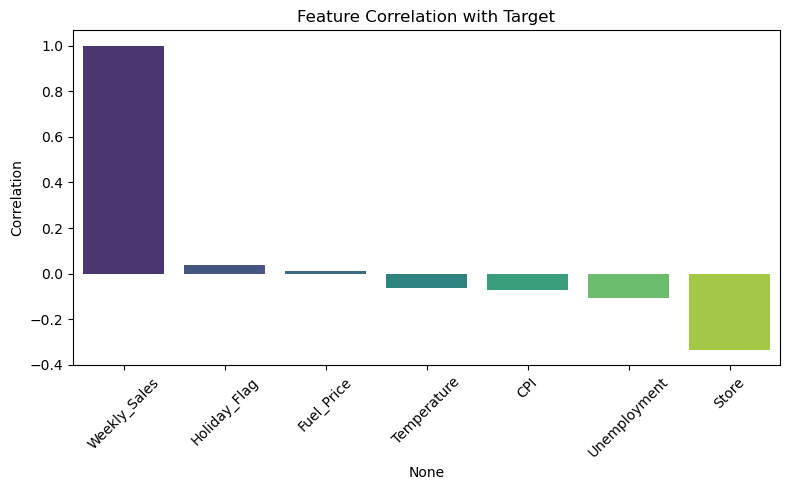

In [257]:
data=data.drop(columns=['Date'])
correlation_with_y = data.corr()['Weekly_Sales'].sort_values(ascending=False)
print(correlation_with_y)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_y.index, y=correlation_with_y.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Feature Correlation with Target")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()


In [261]:
dat=data.drop(columns=['Temperature','CPI','Unemployment'])
dat.head()

,Store,Weekly_Sales,Holiday_Flag,Fuel_Price
0,1,1643690.90,0,2.572
1,1,1641957.44,1,2.548
2,1,1611968.17,0,2.514
3,1,1409727.59,0,2.561
4,1,1554806.68,0,2.625


In [262]:
new_order=[1,0,2,3]
dat=dat[dat.columns[new_order]]
dat.head()

,Weekly_Sales,Store,Holiday_Flag,Fuel_Price
0,1643690.90,1,0,2.572
1,1641957.44,1,1,2.548
2,1611968.17,1,0,2.514
3,1409727.59,1,0,2.561
4,1554806.68,1,0,2.625


In [265]:
X=dat.iloc[:,1:]
y=dat.iloc[:,0]
X_fea=['Store','Holiday_Flag','Fuel_Price']
print(X.shape)
print(y.shape)
X_ = pd.get_dummies(X, columns=['Store'], prefix='store')

(6435, 3)
(6435,)


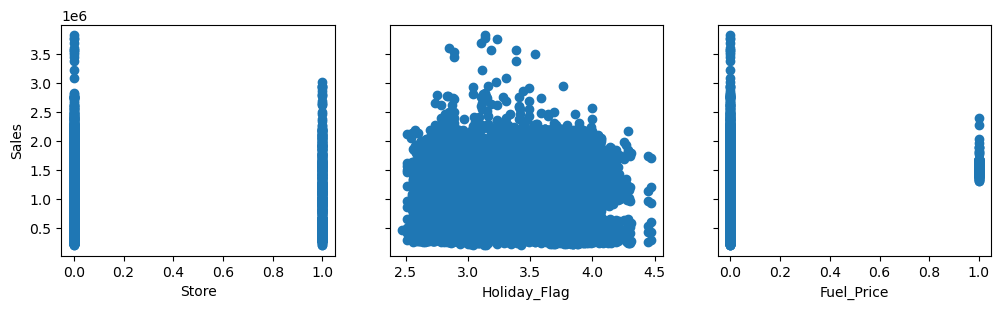

In [267]:
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_.iloc[:,i],y)
    ax[i].set_xlabel(X_fea[i])
ax[0].set_ylabel("Sales")
plt.show()

In [268]:
X_mean = X_.mean(axis=0)
X_std = X_.std(axis=0)
X_n = (X_ - X_mean) / X_std

X_n=X_n.to_numpy()


In [269]:
y_mean = y.mean()
y_std = y.std()
y_n = ((y - y_mean) / y_std).to_numpy()



In [270]:
print(X_n.shape, y_n.shape)
print(np.isnan(X_n).any(), np.isnan(y_n).any())

(6435, 47) (6435,)
False False


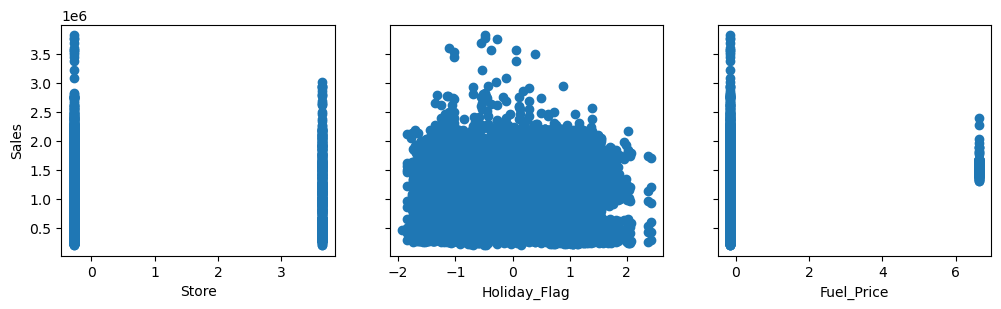

In [271]:
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_n[:,i],y)
    ax[i].set_xlabel(X_fea[i])
ax[0].set_ylabel("Sales")
plt.show()

In [272]:
def cost_func(X,y,w,b):
    m,n=X.shape
    cost=0.0
    for i in range(m):
        f=((np.dot(X[i],w)+b)-y[i])**2
        cost+=f
    total=cost/(2*m)
    return total
        

In [273]:
def gradient(X,y,w,b):
    m,n=X.shape
    
    dj_dw=np.zeros(X.shape[1])
    dj_db=0.0
    for i in range(m):
        f=(np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j]+=f*X[i,j]
        dj_db+=f
    
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db
    
            

In [284]:
def para(X,y,w,b,epochs,alpha):
    m,n=X.shape
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    wn=w
    bn=b
    for i in range(epochs):
        dj_dw,dj_db=gradient(X,y,wn,bn)
        wn=wn-(alpha*dj_dw)
        bn=bn-(alpha*dj_db)
        j=cost_func(X,y,wn,bn)
        
        if i% math.ceil(epochs/10)==0:
            hist["cost"].append(j)
            hist["params"].append([wn,bn])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)
            print(f"Iteration:{i}/{epochs}",f"Cost:{j}",f"w:{wn}",f"b:{bn}")
    return wn,bn,hist  
        

In [285]:
m,n=X_n.shape
w=np.zeros(X_n.shape[1])
b=0.0
epochs=1000
alpha=0.1
w_f,b_f,hist=para(X_n,y_n,w,b,epochs,alpha)
print(f"b,w found by gradient descent: {b_f:0.2f},{w_f} ")



Iteration:0/1000 Cost:0.41078459067158174 w:[ 0.00368852  0.00094623  0.01357683  0.02347264 -0.01720838  0.02798565
 -0.01947055  0.01382961 -0.01272338 -0.00369177 -0.01343486  0.02276945
  0.00826465 -0.00101401  0.02555254  0.02601618 -0.01131588 -0.01409548
 -0.00409692  0.00100841  0.01063161  0.02833192 -0.00776991 -0.00049317
  0.00915895  0.00827459 -0.009088   -0.00117667  0.0194518   0.00738693
 -0.01355583 -0.01625015  0.0093202   0.00319464 -0.02102375 -0.00214172
 -0.00339861 -0.01798812 -0.01410476 -0.01766173  0.01078303 -0.0022126
  0.00590726 -0.01310303 -0.01104845 -0.01987823 -0.00697094] b:4.264740162503379e-17
Iteration:100/1000 Cost:0.04056465477678921 w:[ 0.03614575 -0.00955555  0.13234541  0.22911772 -0.16870673  0.27324268
 -0.1908287   0.13481738 -0.12478067 -0.03652623 -0.13180499  0.22332832
  0.08039702 -0.00915977  0.24966013  0.25459535 -0.10998878 -0.13819855
 -0.04028539  0.01011508  0.10463823  0.27724126 -0.07640682 -0.00456907
  0.08982014  0.081588

In [294]:
for i in range(6000,):
    pred_norm = np.dot(X_n[i], w_f) + b_f
    pred_original = pred_norm * y_std + y_mean
    print(f"prediction: {pred_original:.2f}, target value: {y[i]:.2f}")
print(pred_original.shape)


prediction: 1557304.09, target value: 1643690.90
prediction: 1637556.93, target value: 1641957.44
prediction: 1557987.51, target value: 1611968.17
prediction: 1557433.70, target value: 1409727.59
prediction: 1556679.57, target value: 1554806.68
prediction: 1556184.68, target value: 1439541.59
prediction: 1555560.17, target value: 1472515.79
prediction: 1555418.77, target value: 1404429.92
prediction: 1555571.95, target value: 1594968.28
prediction: 1554971.00, target value: 1545418.53
prediction: 1554523.24, target value: 1466058.28
prediction: 1554676.42, target value: 1391256.12
prediction: 1554853.17, target value: 1425100.71
prediction: 1554205.09, target value: 1603955.12
prediction: 1553981.21, target value: 1494251.50
prediction: 1554311.14, target value: 1399662.07
prediction: 1555100.62, target value: 1432069.95
prediction: 1555736.91, target value: 1615524.71
prediction: 1556172.90, target value: 1542561.09
prediction: 1556538.18, target value: 1503284.06
prediction: 1556349.

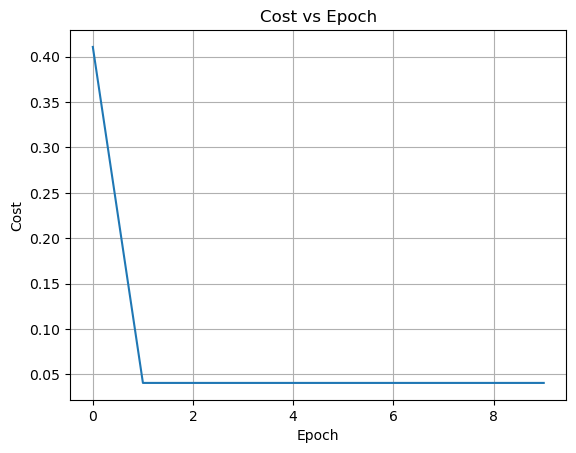

In [287]:
plt.plot(hist["cost"])
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.grid(True)
plt.show()


In [290]:
print("iter length:", len(hist["iter"]))
print("cost length:", len(hist["cost"]))


iter length: 10
cost length: 10


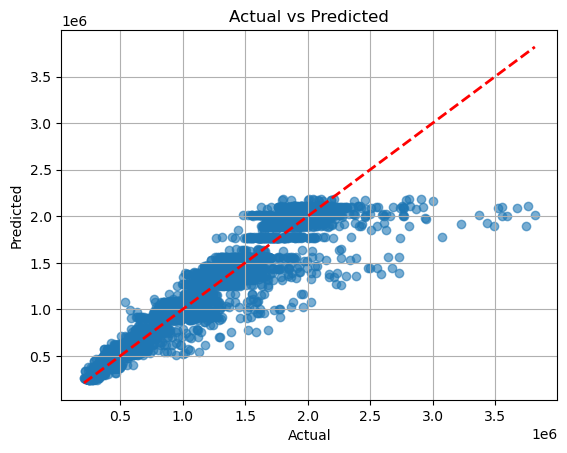

In [291]:
# ---- Predict all values ----
y_pred_n = np.dot(X_n, w_f) + b_f         # predictions in normalized scale
y_pred = y_pred_n * y_std + y_mean        # convert back to original scale

# ---- Plot Actual vs Predicted ----
plt.figure()
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)  # ideal line y = x
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()



In [292]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred_pol = model.predict(X_poly)

print("MSE (Linear):", mean_squared_error(y, y_pred))
print("MSE (Polynomial):", mean_squared_error(y, y_pred_poly))


MSE (Linear): 25840470324.502182
MSE (Polynomial): 317634031114.86426
